In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('itdaa_ej.csv')
df.shape

(101, 27)

In [2]:
df = df.dropna(subset = ['answer_text_length'])

### 어떤 카테고리의 콘텐츠가 가장 많을까?

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
category_count = df['category'].value_counts()
category_count.plot(kind='pie')

- 영업/영업관리, 전문/특수, 회계/재무/금융, 마케팅/MD 카테고리의 글이 가장 많다.
  - 영업/영업관리: 94개 중 10개, 10.64%
  - 전문/특수: 94개 중 9개, 9.57%
  - 회계/재무/금융: 94개 중 9개, 9.57%
  - 마케팅/MD: 94개 중 9개, 9.57%
- 건축, 미디어 카테고리는 콘텐츠가 하나도 없다.

###  페이지뷰가 가장 높은 카테고리는 무엇일까?

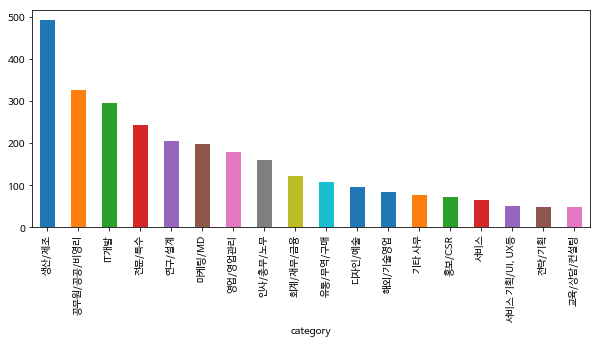

In [4]:
plt.figure(figsize=(10,4))
category_pvs = df.groupby(['category']).unique_pageviews.mean()
category_pvs.sort_values(ascending = False).plot.bar()

### 세션이 가장 많았던 카테고리는 무엇일까?

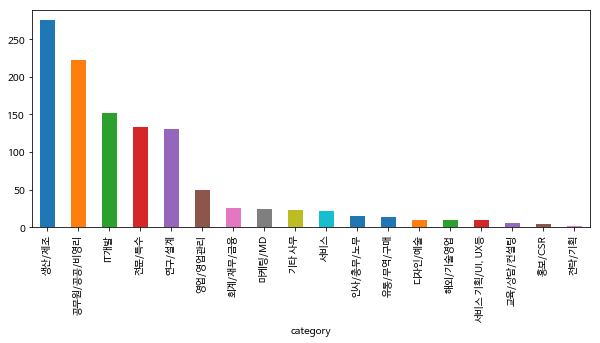

In [5]:
plt.figure(figsize=(10,4))
category_ss = df.groupby(['category']).sessions.mean()
category_ss.sort_values(ascending = False).plot.bar()

- 생산/제조, 공무원/공공/비영리, IT개발, 전문/특수, 연구/설계는 순위가 동일하다.
  - 잇다의 유저들이 가장 관심있어하는 카테고리라 유추할 수 있다.
- pageviews 순위 > sessions 순위 : 세션에 비해 페이지뷰가 높았다. 
  - 마케팅/MD(9)
  - 인사/총무/노무(7)
  - 유통/무역/구매(7)
  - 디자인/예술(3)
  - 해외/기술영업(2)
  - 홍보/CSR(3)
  - 전략/기획(1)
- pageviews 순위 < sessions 순위 : 세션이 많았으나 페이지뷰가 그만큼 높지 않았다.
  - 영업/영업관리(10)
  - 회계/재무/금융(9)
  - 기타 사무(6)
  - 서비스(8)
  - 서비스 기획/UI,UX등(5)
  - 교육/상담/컨설팅(2)


### 이탈률이 가장 높은 카테고리는 무엇일까?

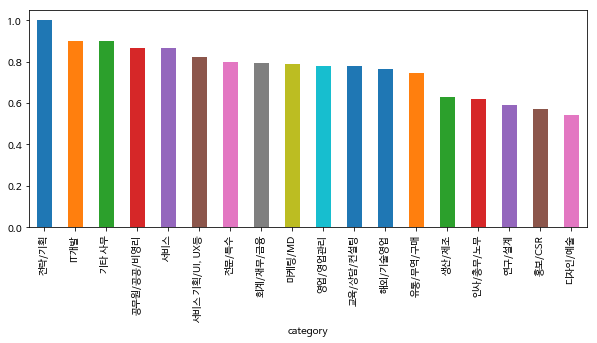

In [6]:
plt.figure(figsize=(10,4))
category_bnc = df.groupby(['category']).bounce_rate.mean()
category_bnc.sort_values(ascending = False).plot.bar()

### 분석1. 카테고리 콘텐츠 갯수와 페이지뷰, 이탈률, 세션
**가설**
1. 카테고리 내 콘텐츠 갯수가 많을수록 페이지뷰 수가 높을 것이다.
2. 카테고리 내 콘텐츠 갯수가 많을수록 이탈률은 낮을 것이다.
3. 카테고리 내 콘텐츠 갯수가 많을수록 세션은 높을 것이다.

In [163]:
category_df = pd.DataFrame({'name': df.category})
category_df.set_index('name', inplace=True)
category_df['count'] = category_count
category_df['avg_pageviews'] = category_pvs
category_df = category_df[~category_df.index.duplicated(keep='first')]
category_df.head(20)

,count,avg_pageviews
name,,
전문/특수,9,243.222222
마케팅/MD,9,197.333333
회계/재무/금융,9,120.888889
연구/설계,4,204.000000
인사/총무/노무,7,160.142857
기타 사무,6,76.833333
영업/영업관리,10,179.100000
서비스,8,65.250000
유통/무역/구매,7,107.714286


In [67]:
from scipy.stats import linregress

def get_linear_regression(x, y):
    gradient, intercept, r_value, p_value, std_err = linregress(x,y)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=gradient*x1+intercept
    plt.plot(x,y,'ob')
    plt.plot(x1,y1,'-r')
    plt.show()

In [73]:
import statsmodels.regression.linear_model as lm
import statsmodels.graphics.regressionplots as rp

def draw_outliers(x, y):
    model = lm.OLS(x, y)
    result = model.fit()
#     fig, ax = plt.subplots(figsize=(8,6))
#     fig = rp.influence_plot(result, ax=ax, criterion="cooks")
    influence = result.get_influence()
    #c is the distance and p is p-value
    (c, p) = influence.cooks_distance
    plt.stem(np.arange(len(c)), c, markerfmt=",")

#### 1) 콘텐츠 갯수와 평균 페이지뷰

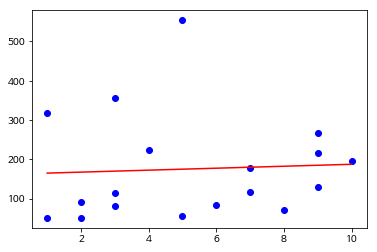

In [68]:
get_linear_regression(category_df['count'], category_df['avg_pageviews'])

생산/제조, 공무원/공공/비영리, IT개발 카테고리가 회귀선과 거리가 가장 먼 카테고리들이다. 이 중 생산/제조(5, 554)를 제거하고 다시 그려보자

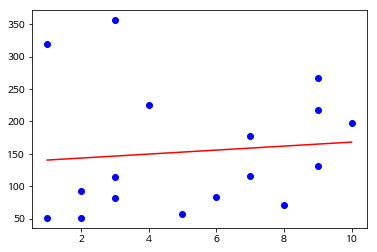

In [83]:
non_outlier_df = category_df.drop(['생산/제조'])
get_linear_regression(non_outlier_df['count'], non_outlier_df['avg_pageviews'])

- 대체적으로 콘텐츠의 갯수가 많을 수록 평균 페이지뷰수도 늘어난다.
- 콘텐츠 갯수가 많지 않음에도 평균 페이지뷰수가 높은 카테고리는 다음과 같다.
  - 생산/제조(5개, 554)
  - 공무원/공공/비영리(3개, 356)
  - IT개발(1개, 319)

#### 2) 콘텐츠 갯수와 평균 이탈률

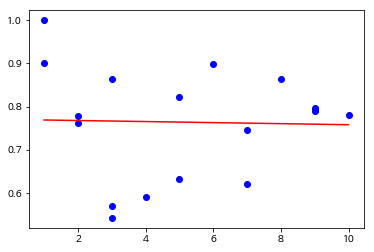

In [164]:
category_df['bounce_rate'] = category_bnc
category_df = category_df[~category_df.index.duplicated(keep='first')]

get_linear_regression(category_df['count'], category_df['bounce_rate'])

전략/기획(1개, 1.0), 디자인/예술(3개, 0.542)은 회귀선과 가장 멀리 떨어져있다. 전략/기획을 제외하고 다시 그려보자.

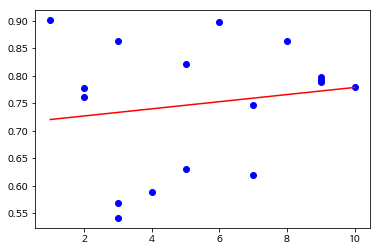

In [165]:
non_outlier_df = category_df.drop(['전략/기획'])
get_linear_regression(non_outlier_df['count'], non_outlier_df['bounce_rate'])

- 회귀선은 우상향하지만 콘텐츠 갯수가 늘어날수록 이탈률도 높아진다고 하기엔 어렵다.(패턴이 확연히 보이지 않는다.)
- '전략/기획'(1개, 1.0) 카테고리는 콘텐츠 갯수는 적지만 이탈률이 가장 높다.
  - 해당 글의 세션이 1이기 때문에 유의미한 데이터로 보기 어렵다.
- 'IT개발'(1개, 0.9) 카테고리는 세션수와 페이지뷰는 높으나 이탈률이 높은 것으로 보아 관련 콘텐츠가 없어서 이탈한다고 추측할 수 있지 않을까.
- '디자인/예술'(3개, 0.542), '홍보/CSR'(3, 0.569) 카테고리는 컨텐츠 갯수는 적지만 이탈률이 가장 낮다. -> 왜일까?(추후분석하기)

#### 3) 콘텐츠 갯수와 평균 세션

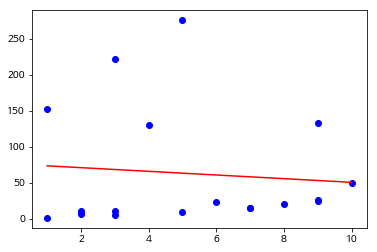

In [166]:
category_df['session'] = df.groupby(['category']).sessions.mean()
category_df = category_df[~category_df.index.duplicated(keep='first')]

get_linear_regression(category_df['count'], category_df['session'])

생산/제조(5개, 275.4), 공무원/공공/비영리(3개, 222)는 회귀선과 가장 멀리 떨어져있다. 생산/제조를 제외하고 다시 그려보자.


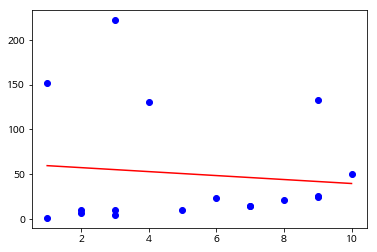

In [167]:
non_outlier_df = category_df.drop(['생산/제조'])
get_linear_regression(non_outlier_df['count'], non_outlier_df['session'])

그래프는 우하향으로 그려졌지만 세션수가 100 이상인 카테고리를 아웃라이어로 제외시키고 나머지 데이터들을 보면 우상향하는 것을 볼 수 있다. 
- 콘텐츠 갯수가 많을수록 세션수는 증가하는 경향을 보인다.
- 하지만 콘텐츠 갯수와 관계 없이 세션수가 유난히 큰 카테고리들이 존재한다.
  - 생산/제조(5개, 275.4)
  - 공무원/공공/비영리(3개, 222)
  - IT개발(1개, 152)
  - 연구/설계(4개, 130.25)
  - 전문/특수(9개, 133.33)
- 왜 이 카테고리들의 세션수는 높을까?  

**분석1 정리**

1. 카테고리 내 콘텐츠 갯수가 많을수록 페이지뷰 수가 높을 것이다.
  - 대체적으로 그런 편이지만 경향을 벗어나는 카테고리들이 존재한다.
	- 생산/제조(5개, 554)
	- 공무원/공공/비영리(3개, 356)
	- IT개발(1개, 319)
2. 카테고리 내 콘텐츠 갯수가 많을수록 이탈률은 낮을 것이다.
  - 현재 존재하는 데이터만으로 확인하기가 쉽지 않다. 콘텐츠의 전체 양이 더 많아지면 확인 가능할 것이라 생각한다.
3. 카테고리 내 콘텐츠 갯수가 많을수록 세션은 높을 것이다.
  - 아웃라이어를 제외하고 보면 갯수와 세션은 함께 증가한다. 아웃라이어는 다음과 같다.
	- 생산/제조(5개, 275.4)
	- 공무원/공공/비영리(3개, 222)
	- IT개발(1개, 152)
	- 연구/설계(4개, 130.25)
	- 전문/특수(9개, 133.33)
    
카테고리 콘텐츠 갯수와 이탈률 관계분석에서 유의미한 정보를 얻지 못했다. 콘텐츠 갯수가 아닌 페이지뷰수나 세션수를 분석해보면 유의미한 정보를 얻을 수 있지 않을까?

### 분석2. 카테고리 이탈률과 페이지뷰, 세션
**가설**
1. 페이지뷰가 많을수록 이탈률도 높을 것이다.
2. 세션이 많을수록 이탈률도 높을 것이다.

#### 1) 이탈률과 평균 페이지뷰수

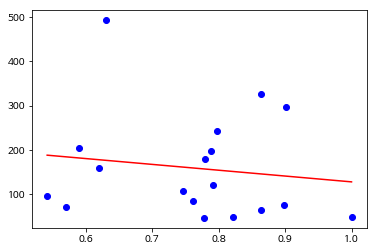

In [168]:
get_linear_regression(category_df['bounce_rate'], category_df['avg_pageviews'])

생산/제조(0.631, 554)가 회귀선과 가장 멀다. 이를 제외하고 다시 그려보자.

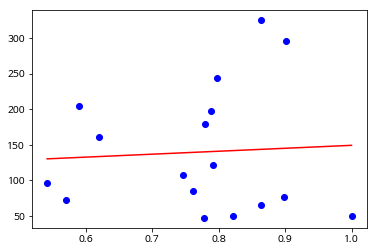

In [169]:
non_outlier_df = category_df.drop(['생산/제조'])
get_linear_regression(non_outlier_df['bounce_rate'], non_outlier_df['avg_pageviews'])

- 페이지뷰 수가 증가하면 이탈률도 증가하는 편이다.
- 생산/제조(0.631, 554) 카테고리는 높은 페이지뷰 수에도 이탈률이 낮은 편이다. -> 왜 그럴까?
- 전략/기획(1.0, 51), 교육/상담/컨설팅(0.778, 51) 카테고리는 페이지뷰 수가 낮지만 이탈률이 높은 편이다. -> 왜 그럴까?

#### 2) 이탈률과 평균 세션

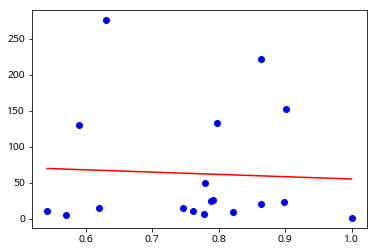

In [170]:
get_linear_regression(category_df['bounce_rate'], category_df['session'])

생산/제조(0.631, 275.4)를 제외하고 그려보자

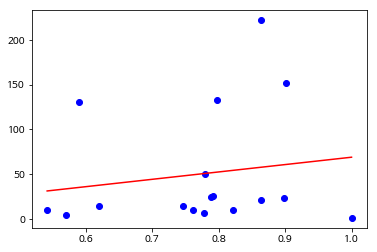

In [171]:
non_outlier_df = category_df.drop(['생산/제조'])
get_linear_regression(non_outlier_df['bounce_rate'], non_outlier_df['session'])

- 세션이 증가하면 이탈률도 증가하는 편이다.
- 생산/제조(0.631, 275.4) 카테고리는 가장 많은 세션이 있지만 이탈률은 낮은 편이다.
- 전략/기획(1.0, 1) 카테고리는 세션이 가장 작자만 이탈률이 가장 높다.

**분석2 정리**

1. 페이지뷰가 많을수록 이탈률도 높을 것이다.
  - 대체적으로 그런 편이지만 경향을 벗어나는 카테고리가 있다.
  - 생산/제조(0.631, 554) : 이탈률이 낮고 뷰수가 높다.
  - 전략/기획(1.0, 51) : 이탈률이 매우 높고, 뷰수는 매우 낮다.
2. 세션이 많을수록 이탈률도 높을 것이다.
  - 대체적으로 그런 편이지만 경향을 벗어나는 카테고리가 있다.
  - 생산/제조(0.631, 275.4) : 이탈률이 낮고 세션이 높다.
  - 전략/기획(1.0, 1) : 이탈률이 매우 높고, 세션이 고작 1이다.
  
이탈률 대비 페이지뷰 값을 구해보면 유저들의 선호도가 나올 수 있지 않을까?(이탈률 1%당 페이지뷰)

In [172]:
category_df['pv/br'] = category_df['avg_pageviews']/(category_df['bounce_rate']*100)
category_df = category_df[~category_df.index.duplicated(keep='first')]

In [173]:
category_df.sort_values(by='pv/br',ascending = False)

,count,avg_pageviews,bounce_rate,session,pv/br
name,,,,,
생산/제조,5,492.200000,0.630949,275.400000,7.800947
공무원/공공/비영리,3,325.000000,0.864196,222.000000,3.760721
연구/설계,4,204.000000,0.589362,130.250000,3.461367
IT개발,1,296.000000,0.901316,152.000000,3.284088
전문/특수,9,243.222222,0.797678,133.333333,3.049128
인사/총무/노무,7,160.142857,0.619890,14.857143,2.583407
마케팅/MD,9,197.333333,0.788715,24.000000,2.501959
영업/영업관리,10,179.100000,0.779645,50.100000,2.297199
디자인/예술,3,96.333333,0.541667,10.000000,1.778462
